# Python Training (Session 4)

## Exploratory Data Analysis

Exploratory data analysis uses data visualisation techniques to draw inferences and obtain insights from them. However, EDA is much more than plotting graphs or visualising data, it is more about understanding and studying the given data in detail. Visualisation of data into plots/graphs can be termed as one of the tools in the EDA process. <br>
<br>
EDA also involves the preparation of data sets for analysis by removing irregularities in the data, so that these irregularities do not affect the further steps in the process of data analysis and machine learning model building.

### Steps in EDA :
1. Load data
2. Data Summary
3. Data Cleaning
4. Univariate Analysis
5. Bivariate and Multivariate Analysis

### Importing libraries

In [1]:
import numpy as np
import pandas as pd

# Do not display warnings
import warnings
warnings.filterwarnings('ignore')

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Save plots inline in the notebook
%matplotlib inline

### Load Data

In [2]:
# Importing data

course_data = pd.read_csv('coursera_data.csv')

### Data Summary

In [3]:
# Data Head

course_data.head()

,Course Data file,Unnamed: 1,Unnamed: 2,2019 August,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,This file contains the data of coursera courses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s no,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,num_students,usa_students,course_length
2,0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000,177600,210
3,1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000,NaN,275
4,2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000,825000,50


In [4]:
# Importing again - skipping top 2 rows

course_data = pd.read_csv('coursera_data.csv', skiprows = 2)

In [5]:
# Data Head

course_data.head()

,s no,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,num_students,usa_students,course_length
0,0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000.0,177600.0,210
1,1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000.0,NaN,275
2,2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0,825000.0,50
3,3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0,NaN,141
4,4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000.0,NaN,585


In [6]:
# Data Tail

course_data.tail()

,s no,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,num_students,usa_students,course_length
886,886,Understanding Modern Finance,American Institute of Business and Economics,SPECIALIZATION,4.4,Intermediate,11000.0,NaN,272
887,887,Object-Oriented Design,University of Alberta,COURSE,4.7,Intermediate,33000.0,4290.0,25
888,888,Aprende a programar con Python,Universidad Austral,SPECIALIZATION,4.2,Beginner,6600.0,NaN,310
889,889,Погружение в Python,Moscow Institute of Physics and Technology,COURSE,4.7,Intermediate,45000.0,NaN,69
890,890,Compassionate Leadership Through Service Learn...,University of Colorado Boulder,COURSE,4.9,Beginner,6400.0,NaN,76


In [7]:
# Drop s no column

course_data.drop('s no', axis = 1, inplace = True)

In [8]:
# Checking Data Head again

course_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,num_students,usa_students,course_length
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000.0,177600.0,210
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000.0,NaN,275
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0,825000.0,50
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0,NaN,141
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000.0,NaN,585


In [9]:
# Data Shape

course_data.shape

(891, 8)

In [10]:
# Number of rows

course_data.shape[0]

891

In [11]:
# Data types

course_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   course_title             891 non-null    object 
 1   course_organization      874 non-null    object 
 2   course_Certificate_type  891 non-null    object 
 3   course_rating            891 non-null    float64
 4   course_difficulty        871 non-null    object 
 5   num_students             873 non-null    float64
 6   usa_students             295 non-null    float64
 7   course_length            891 non-null    int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 55.8+ KB


In [12]:
# Columns names

course_data.columns

Index(['course_title', 'course_organization', 'course_Certificate_type',
       'course_rating', 'course_difficulty', 'num_students', 'usa_students',
       'course_length'],
      dtype='object')

In [13]:
# Statistical summary of numerical columns

course_data.describe()

,course_rating,num_students,usa_students,course_length
count,891.000000,8.730000e+02,295.000000,891.000000
mean,4.677329,9.073780e+04,22663.484746,103.291807
std,0.162225,1.831522e+05,55197.814703,89.010769
min,3.300000,1.500000e+03,0.000000,10.000000
25%,4.600000,1.800000e+04,3525.000000,37.000000
50%,4.700000,4.200000e+04,9400.000000,63.000000
75%,4.800000,1.000000e+05,25950.000000,167.000000
max,5.000000,3.200000e+06,825000.000000,585.000000


In [14]:
# Statistical summary of all columns

course_data.describe(include = 'all')

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,num_students,usa_students,course_length
count,891,874,891,891.000000,871,8.730000e+02,295.000000,891.000000
unique,888,153,3,NaN,4,NaN,NaN,NaN
top,Machine Learning,University of Pennsylvania,COURSE,NaN,Beginner,NaN,NaN,NaN
freq,2,58,582,NaN,479,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.677329,NaN,9.073780e+04,22663.484746,103.291807
std,NaN,NaN,NaN,0.162225,NaN,1.831522e+05,55197.814703,89.010769
min,NaN,NaN,NaN,3.300000,NaN,1.500000e+03,0.000000,10.000000
25%,NaN,NaN,NaN,4.600000,NaN,1.800000e+04,3525.000000,37.000000
50%,NaN,NaN,NaN,4.700000,NaN,4.200000e+04,9400.000000,63.000000
75%,NaN,NaN,NaN,4.800000,NaN,1.000000e+05,25950.000000,167.000000


### Data Cleaning

One can encounter different kinds of issues in a dataset. Irregularities may appear in the form of **missing values, anomalies/outliers, incorrect format and inconsistent spelling, etc.**, These irregularities may propagate further and affect the assumptions and analysis based on that dataset and may hamper the further process of machine learning model building. Hence, data cleaning is a very important step in EDA.

#### Missing Values

Missing values can be of three types:
1. Missing Completely at Random (MCAR)
2. Missing at Random (MAR)
3. Missing Not at Random (MNAR)

In [6]:
# Number of missing values

course_data.isnull().sum()

NameError: name 'course_data' is not defined

There are different ways to treat missing values depending on the business context:
1. Set specific values as missing (eg. "NA", "XXX", 999, etc.)
2. Get **reliable** information from external sources
3. Remove rows or columns
4. Impute using mean/median/mode or using predictive methods

In [16]:
# Deleting rows where course_organization is missing

course_data = course_data[~course_data['course_organization'].isnull()]

In [17]:
# Dropping usa_students

course_data.drop('usa_students', axis = 1, inplace = True)

In [18]:
# Imputing missing values for course_difficulty with mode

course_data['course_difficulty'].fillna(course_data['course_difficulty'].mode()[0], inplace = True)

In [19]:
# Imputing missing values for num_students with median

course_data['num_students'].fillna(course_data['num_students'].median(), inplace = True)

In [22]:
course_data.isnull().sum()

course_title               0
course_organization        0
course_Certificate_type    0
course_rating              0
course_difficulty          0
num_students               0
course_length              0
dtype: int64

#### Outliers

Outliers are values that are much beyond or far from the next nearest data points.

There are two types of outliers:
1. **Univariate Outliers** - Univariate outliers are those data points in a variable whose values lie beyond the range of expected values.
2. **Multivariate outliers** - While plotting data, some values of one variable may not lie beyond the expected range, but when you plot the data with some other variable, these values may lie far from the expected value. These are called multivariate outliers.

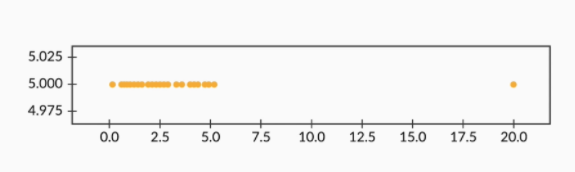

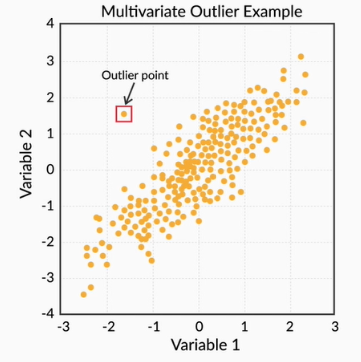

<AxesSubplot:ylabel='Frequency'>

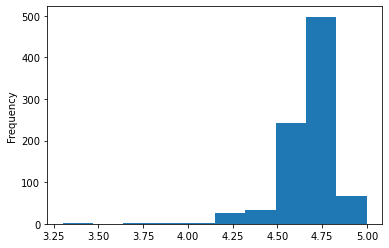

In [23]:
# Identifying outliers by Histogram

course_data['course_rating'].plot.hist()

<AxesSubplot:xlabel='course_rating'>

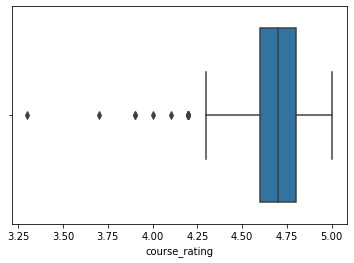

In [24]:
# Identifying outliers by Box plot

sns.boxplot(course_data['course_rating'])

In [25]:
# Identifying outliers by quantiles

course_data['course_rating'].quantile([0.01, 0.05, 0.1, 0.25, 0.5])

0.01    4.2
0.05    4.4
0.10    4.5
0.25    4.6
0.50    4.7
Name: course_rating, dtype: float64

In [26]:
# Summary of outliers

course_data[course_data['course_rating'] < 4.2].describe()

,course_rating,num_students,course_length
count,6.000000,6.000000,6.000000
mean,3.816667,51166.666667,217.500000
std,0.285774,49109.741057,100.336932
min,3.300000,13000.000000,85.000000
25%,3.750000,18500.000000,138.750000
50%,3.900000,31500.000000,235.000000
75%,3.975000,65500.000000,293.750000
max,4.100000,140000.000000,330.000000


In [27]:
# Identifying outliers by IQR

q1 = course_data['course_rating'].quantile(0.25)
q3 = course_data['course_rating'].quantile(0.75)
IQR = q3 - q1

course_data[(course_data['course_rating'] < (q1 - 1.5 * IQR)) | (course_data['course_rating'] > (q3 + 1.5 * IQR))]['course_rating']
# (course_data['course_rating'] < (q1 - 1.5 * IQR)) | (course_data['course_rating'] > (q3 + 1.5 * IQR))

178    3.9
339    4.2
345    4.2
352    3.7
472    4.2
550    4.2
569    4.2
609    4.1
618    4.2
659    4.0
731    4.2
767    3.3
779    3.9
803    4.2
821    4.2
888    4.2
Name: course_rating, dtype: float64

Outliers can be treated by :
1. Imputation
2. Removal
3. Binning
4. Capping

In [28]:
# Capping the course_rating variable

course_data['course_rating'] = np.where(course_data['course_rating'] < 4.2, 4.2, course_data['course_rating'])

<AxesSubplot:xlabel='course_rating'>

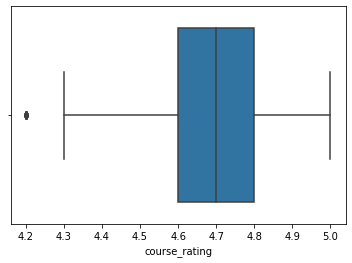

In [29]:
# Identifying outliers by Box plot

sns.boxplot(course_data['course_rating'])

### Univariate Analysis

It deals with analysing a single column/variable.

You may find outliers/missing values at this stage too.

In [30]:
# Data Head again

course_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,num_students,course_length
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000.0,210
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000.0,275
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0,50
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0,141
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000.0,585


#### Categorical Unordered Univariate Analysis

In [31]:
# Value counts for course_title

course_data['course_title'].value_counts()

Developing Your Musicianship                                          2
Machine Learning                                                      2
Marketing Digital                                                     2
¿Qué hacen los buenos directivos? Prioridades de la Alta Dirección    1
Financial Reporting                                                   1
                                                                     ..
Foundations of Business Strategy                                      1
English for Journalism                                                1
International Women's Health and Human Rights                         1
Understanding Clinical Research: Behind the Statistics                1
Introduction aux Droits de l’Homme                                    1
Name: course_title, Length: 871, dtype: int64

<AxesSubplot:>

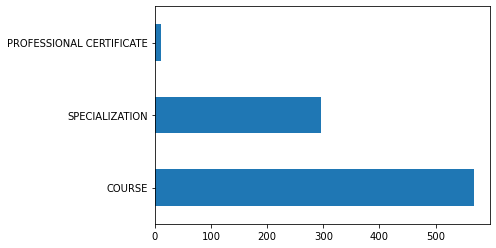

In [32]:
# Bar plot for course_Certificate_type

course_data['course_Certificate_type'].value_counts().plot.barh()

#### Categorical Ordered Univariate Analysis

In [33]:
# Value counts of course_difficulty

course_data['course_difficulty'].value_counts(normalize = True)

Beginner        0.560641
Intermediate    0.217391
Mixed           0.203661
Advanced        0.018307
Name: course_difficulty, dtype: float64

<AxesSubplot:ylabel='course_difficulty'>

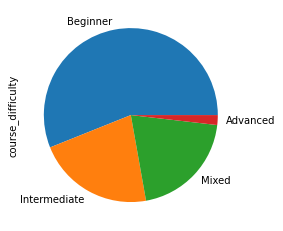

In [34]:
# Pie chart of course_difficulty

course_data['course_difficulty'].value_counts(normalize = True).plot.pie()

#### Numerical Features

<AxesSubplot:xlabel='num_students', ylabel='Density'>

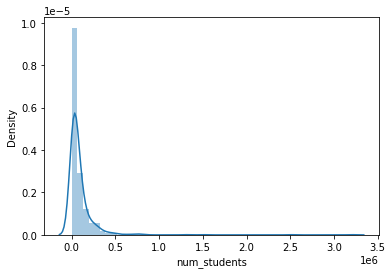

In [35]:
# Distplot of num_students

sns.distplot(course_data['num_students'])

<AxesSubplot:xlabel='num_students', ylabel='Density'>

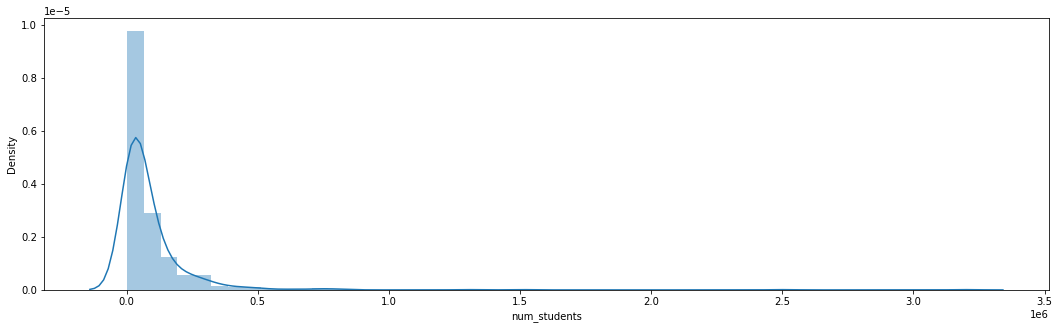

In [36]:
# Distplot of num_students

plt.figure(figsize = (18,5))
sns.distplot(course_data['num_students'])

<AxesSubplot:xlabel='course_length', ylabel='Density'>

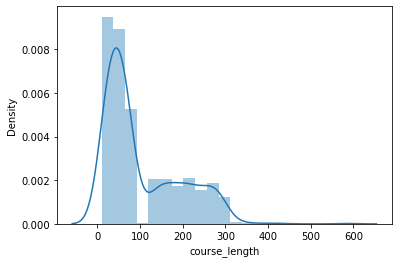

In [37]:
# Distplot of course_length

sns.distplot(course_data['course_length'])

<AxesSubplot:xlabel='course_length'>

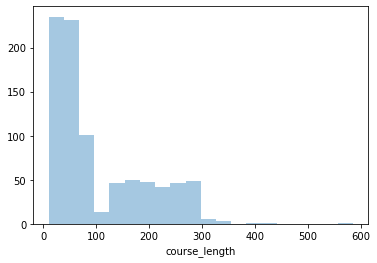

In [38]:
# To remove the kde layer

sns.distplot(course_data['course_length'], kde = False, bins = 20)

### Bivariate and Multivariate Analysis

In [39]:
# Data Head

course_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,num_students,course_length
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000.0,210
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000.0,275
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0,50
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0,141
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000.0,585


#### Numeric - Numeric Analysis

Plot Types:
1. Correlation matrix
2. Scatter Plot
3. Pair plot
4. Joint plot

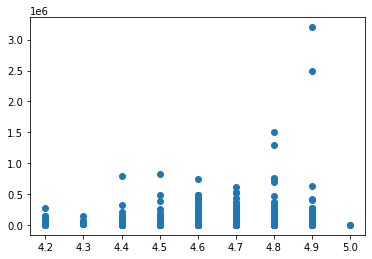

In [40]:
# Scatterplot of course_rating and num_students

plt.scatter(course_data['course_rating'], course_data['num_students'])
plt.show()

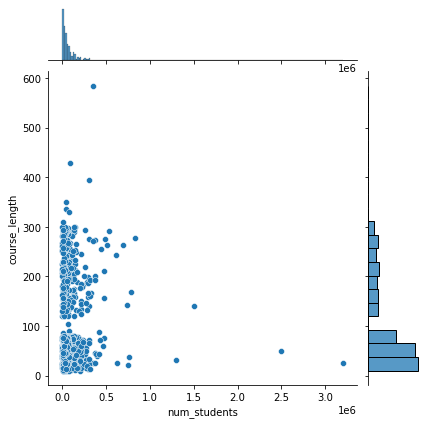

In [41]:
# Jointplot of num_students and course_length

sns.jointplot(x = 'num_students', y = 'course_length', data = course_data, kind = 'scatter')   # 'hex'  # 'reg'

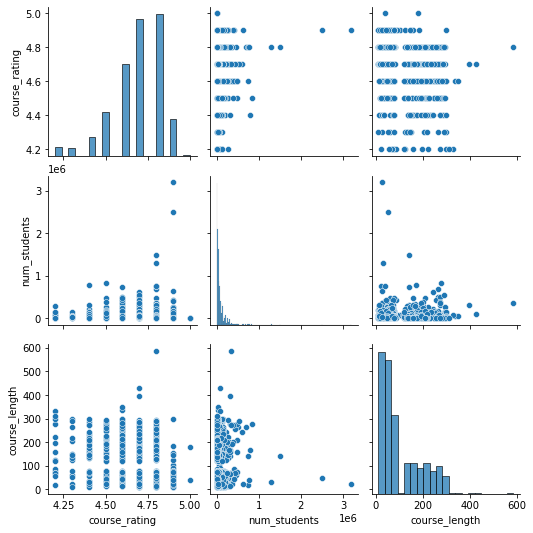

In [42]:
# Pairplot of all variables

sns.pairplot(data = course_data, vars = ['course_rating', 'num_students', 'course_length'])
plt.show()

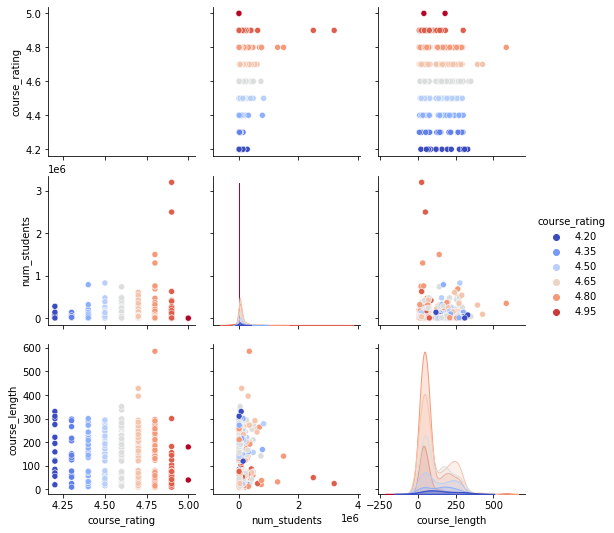

In [43]:
# Pairplot of all variables

sns.pairplot(data = course_data, vars = ['course_rating', 'num_students', 'course_length'], hue = 'course_rating', palette = 'coolwarm')
plt.show()

In [44]:
# Correlation matrix 

course_data[['course_rating', 'num_students', 'course_length']].corr()


,course_rating,num_students,course_length
course_rating,1.000000,0.078436,-0.256251
num_students,0.078436,1.000000,0.017033
course_length,-0.256251,0.017033,1.000000


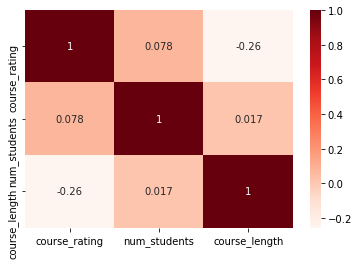

In [45]:
# Correlation heatmap

sns.heatmap(course_data[['course_rating', 'num_students', 'course_length']].corr(), annot = True, cmap = 'Reds')
plt.show()

#### Numerical - Categorical Analysis

In [46]:
course_data.groupby('course_Certificate_type')['num_students'].median()

course_Certificate_type
COURSE                       42000.0
PROFESSIONAL CERTIFICATE    140000.0
SPECIALIZATION               39000.0
Name: num_students, dtype: float64

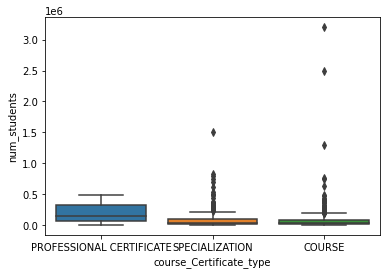

In [47]:
sns.boxplot(data = course_data, x = 'course_Certificate_type', y = 'num_students')
plt.show()

### Data Visualization

#### Basic Matplotlib commands

In [48]:
# Creating dummy data

import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

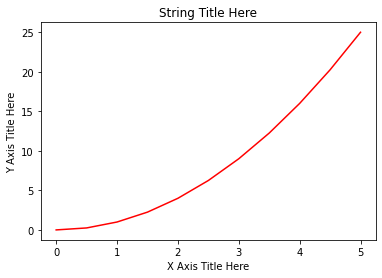

In [51]:
plt.plot(x, y, 'r') # 'r' is color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

#### Creating multiplots

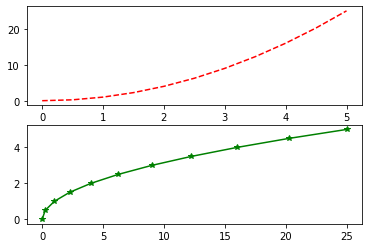

In [53]:
# plt.subplot(nrows, ncols, plot_number)

plt.subplot(2, 1, 1)
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(2, 1, 2 )
plt.plot(y, x, 'g*-')
plt.show()

#### Matplotlib Object Oriented Method

Here, we will instantiate figure objects and then call methods or attributes from that object.

To begin we create a figure instance. Then we can add axes to that figure:

Text(0.5, 1.0, 'Set Title')

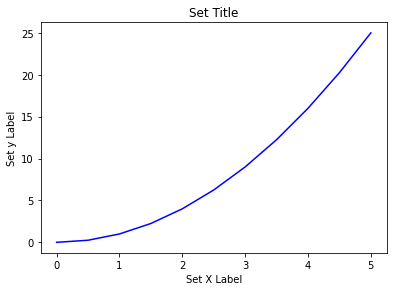

In [54]:
# Create Figure (empty canvas)

fig = plt.figure()

# Add set of axes to figure

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes

axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

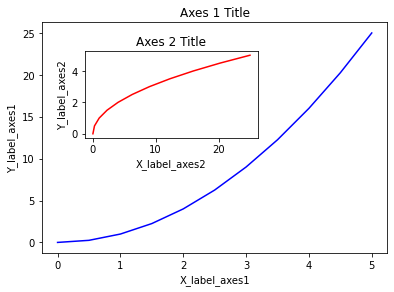

In [55]:
# Creates blank canvas

fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1

axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes1')
axes1.set_ylabel('Y_label_axes1')
axes1.set_title('Axes 1 Title')

# Insert Figure Axes 2

axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title')
plt.show()

#### Subplots

The plt.subplots() object will act as a more automatic axis manager.

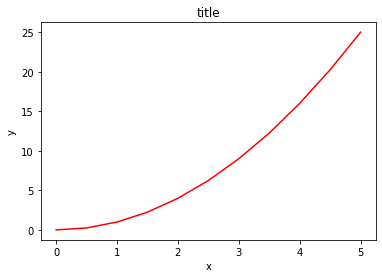

In [56]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes

fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')
plt.show()

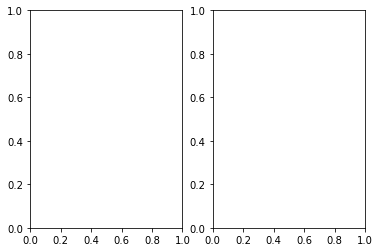

In [57]:
# Empty canvas of 1 by 2 subplots

fig, axes = plt.subplots(nrows=1, ncols=2)

In [58]:
# Axes is an array of axes to plot on

axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

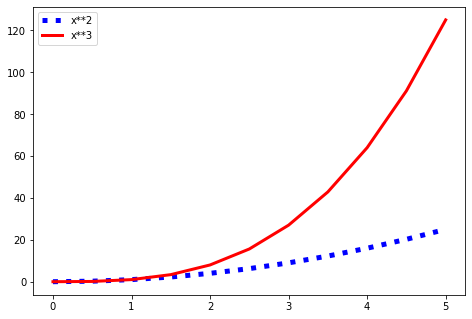

In [72]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig

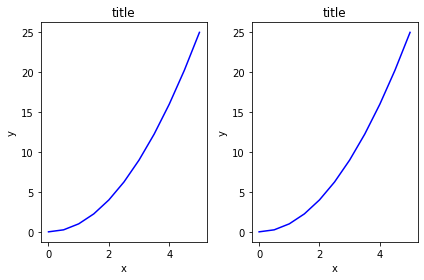

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig
plt.tight_layout()

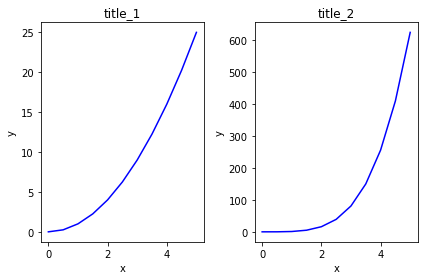

In [73]:
# Creating different charts in subplots

fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(x, y, 'b')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('title_1')

axes[1].plot(x, y**2, 'b')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('title_2')

# Display the figure object    
fig
plt.tight_layout()

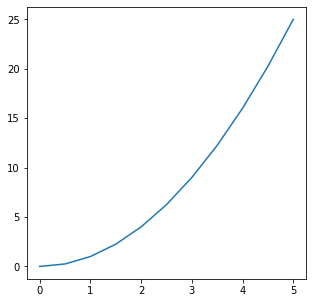

In [63]:
# Changing the size of the figure with figsize

fig = plt.figure(figsize = (5,5))
plt.plot(x, y)
plt.show()

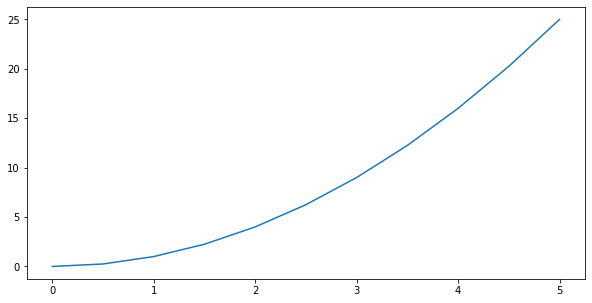

In [64]:
fig = plt.figure(figsize = (10,5))
plt.plot(x, y)
plt.show()

In [65]:
fig.savefig('newfigure1.png')

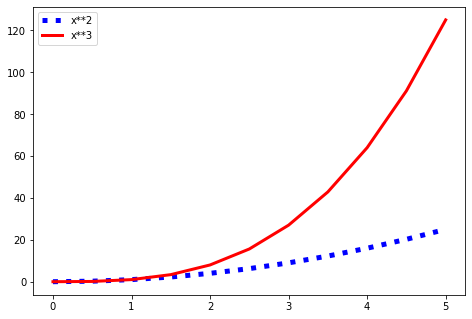

In [66]:
# Adding a legend

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2", color = 'blue', linewidth = 5, linestyle = ':')
ax.plot(x, x**3, label="x**3", color = 'red', lw = 3)
ax.legend()

### Seaborn plots

In [67]:
# Data Head

course_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,num_students,course_length
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000.0,210
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000.0,275
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0,50
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0,141
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000.0,585


<AxesSubplot:xlabel='course_Certificate_type', ylabel='course_length'>

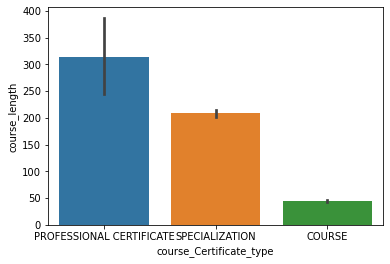

In [68]:
# Bar plot

sns.barplot(x = 'course_Certificate_type', y = 'course_length', data = course_data, estimator = np.mean)

<AxesSubplot:xlabel='course_Certificate_type', ylabel='count'>

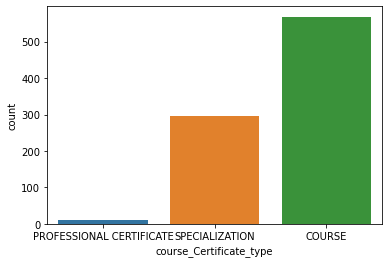

In [69]:
# Count plot

sns.countplot(x = 'course_Certificate_type', data = course_data)

<AxesSubplot:xlabel='course_Certificate_type', ylabel='course_length'>

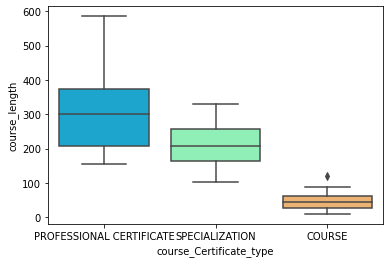

In [70]:
# Box plot

sns.boxplot(x = 'course_Certificate_type', y = 'course_length', data = course_data, palette = 'rainbow')

<AxesSubplot:xlabel='course_difficulty', ylabel='course_length'>

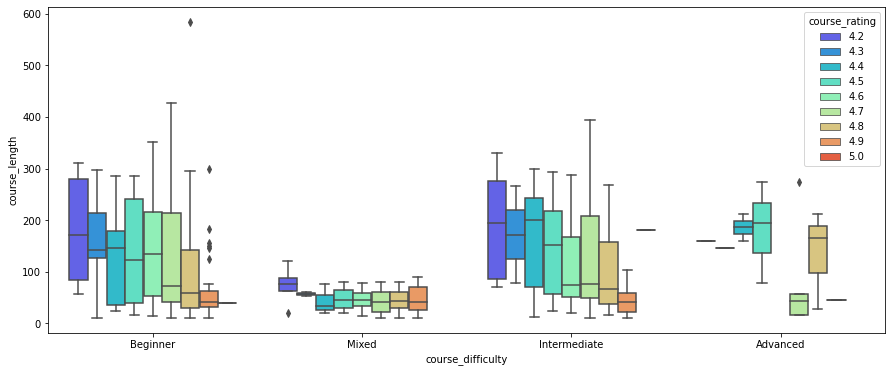

In [71]:
# Box plot

plt.figure(figsize = (15,6))
sns.boxplot(x = 'course_difficulty', y = 'course_length', hue = 'course_rating', data = course_data, palette = 'rainbow')